# UNDERSTANDING THE DATA


### Data Source: [Kaggle](https://www.kaggle.com/datasets/shahzadahmad0402/depression-and-anxiety-data)
### Variables Used for this Analysis:
1. **phq_score:** A score evaluated from an assessment known as the Patient Health Questionairre (PHQ) to determine the severity of mental health problems such as depression. You can learn more about it [here](https://neurospatms.com/everything-you-need-to-know-about-the-phq-9-test/).
    - 0 - 4: None-minimal or Normal
    - 5 - 9: Mild
    - 10 - 14: Moderate
    - 15 - 19: Moderately-severe
    - 20 - 24: Severe
2. **depression_severity:** Estimated from the **phq_score**.
3. **depressiveness:** Whether the participant has clinical depression or not.
4. **depression_diagnosis:** Diagnosis by a mental health specialist as clinically depressed or not.
5. **depression_treatment:** Undergoing treatment or not.
6. **suicidal:** Likelihood of committing suicide with True being most likely.
7. **gad_score:** A score evaluated from an assessment known as Generalized Anxiety Disorder-7 (GAD-7) questionairre to determine the severity of one's anxiety. You can learn more about it [here](https://www.corc.uk.net/outcome-experience-measures/generalised-anxiety-disorder-assessment-gad-7/).
    - 0 - 4: None-minimal or Normal
    - 5 - 9: Mild
    - 10 - 14: Moderate
    - 15 - 21: Severe
8. **anxiety_severity:** Estimated from the **gad_score**.
9. **anxiety_diagnosis:** Diagnosis by a mental health specialist as having Generalized Anxiety Disorder or not.
10. **anxiety_treatment:** Undergoing anxiety treatment or not.
11. **epworth_score:** A test score used to measure daytime sleepiness. You can learn more about it, or even take yours [here](https://healthysleep.med.harvard.edu/narcolepsy/diagnosing-narcolepsy/epworth-sleepiness-scale).
    - 0 - 10: Normal range in healthy adults
    - 11 - 14: Mild sleepiness
    - 15 - 17: Moderate sleepiness
    - 18 - 24: Severe sleepiness
12. **sleepiness:** Likelihood of daytime sleepiness with True being most likely estimated from the **epworth_score**.
13. **bmi:** Body Mass Index of participant measured in kg/m²
14. **who_bmi:** The various categories of nutritional health by Body Mass Index(BMI) according to the WHO. To learn more about it, click [here](https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations).
    - Below 18.5: Underweight
    - 18.5 - 24.9: Normal weight
    - 25.0 - 29.9: Pre-obesity/Overweight
    - 30.0 - 34.9: Class I Obesity
    - 35.0 - 39.9: Class II Obesity
    - Above 40: Class III Obesity
15. **age:** Age of participant ranging from 18 - 31.
16. **gender:** Sex of participant i.e either Male or Female.
17. **school_year:** Current school year ranging from 1 - 4.


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('depression.csv')

In [3]:
df.head(3)

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False


# DATA WRANGLING & CLEANING

This phase of the Data Science workflow is performed under the following steps:
1. Dropping rows with missing values (less than 5% of dataset)
2. Handling out of range data
3. Dealing with incorrect data types
4. Dealing with outliers
5. Removing duplicates
6. Resampling to obtain a stratified sample of gender and school year

In [4]:
#Checking for missing values
df.isna().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64

In [5]:
#Dropping missing values
df.dropna(inplace=True)

In [6]:
#Checking Unique values in each categorical column
list_ = ['school_year', 'who_bmi', 'phq_score', 'depression_severity', 'depressiveness', 'suicidal', 'depression_diagnosis', 'depression_treatment', 'gad_score', 'anxiety_severity', 'anxiousness', 'anxiety_diagnosis', 'anxiety_treatment', 'epworth_score', 'sleepiness']
for col in list_:
    x = df[col].unique()
    print(col + ':', np.sort(x, axis=None), '\n')

school_year: [1 2 3 4] 

who_bmi: ['Class I Obesity' 'Class II Obesity' 'Class III Obesity' 'Normal'
 'Not Availble' 'Overweight' 'Underweight'] 

phq_score: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24] 

depression_severity: ['Mild' 'Moderate' 'Moderately severe' 'None-minimal' 'Severe' 'none'] 

depressiveness: [False True] 

suicidal: [False True] 

depression_diagnosis: [False True] 

depression_treatment: [False True] 

gad_score: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 

anxiety_severity: ['Mild' 'Moderate' 'None-minimal' 'Severe'] 

anxiousness: [False True] 

anxiety_diagnosis: [False True] 

anxiety_treatment: [False True] 

epworth_score: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 24. 31. 32.] 

sleepiness: [False True] 



In [7]:
#Out of range values for epworth score
df[df.epworth_score>=24]

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
407,408,2,21,female,33.057851,Class I Obesity,20,Severe,True,False,False,False,16,Severe,True,False,False,31.0,True
421,422,2,19,male,19.252620,Normal,18,Moderately severe,True,False,False,False,14,Moderate,True,False,False,24.0,True
426,427,2,19,male,23.889463,Normal,10,Moderate,True,True,True,True,8,Mild,False,False,False,32.0,True


In [8]:
#Setting out of range data
df.loc[df['epworth_score']>24, 'epworth_score'] = 20.0

In [9]:
df.drop('id', axis=1, inplace=True)

In [10]:
#Problem with BMI column
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
school_year,765.0,2.288889,1.167377,1.0,1.000000,2.000000,3.000000,4.000000
age,765.0,20.257516,1.772488,18.0,19.000000,20.000000,21.000000,31.000000
bmi,765.0,23.410511,4.590204,0.0,20.957274,23.148148,25.510204,54.552668
phq_score,765.0,7.167320,4.420411,0.0,4.000000,6.000000,9.000000,24.000000
gad_score,765.0,6.882353,4.730071,0.0,3.000000,6.000000,9.000000,21.000000
epworth_score,765.0,6.366013,3.849511,0.0,4.000000,6.000000,9.000000,24.000000


In [11]:
df.bmi.replace(0.0, np.nan, inplace=True)

In [12]:
#Removing rows with missing BMI values
df.dropna(inplace=True)

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
school_year,757.0,2.291942,1.167506,1.000000,1.000000,2.000000,3.000000,4.000000
age,757.0,20.264201,1.773989,18.000000,19.000000,20.000000,21.000000,31.000000
bmi,757.0,23.657914,3.928378,14.880952,21.082813,23.233456,25.535446,54.552668
phq_score,757.0,7.182299,4.431555,0.000000,4.000000,6.000000,9.000000,24.000000
gad_score,757.0,6.922061,4.733144,0.000000,3.000000,6.000000,10.000000,21.000000
epworth_score,757.0,6.361955,3.863550,0.000000,3.000000,6.000000,9.000000,24.000000


In [14]:
df.query("depression_severity=='none'")

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
132,1,20,male,24.212293,Normal,0,none,False,False,False,False,2,None-minimal,False,False,False,7.0,False
218,1,19,male,20.902386,Normal,0,none,False,False,False,False,0,None-minimal,False,False,False,7.0,False
444,2,19,male,25.249337,Overweight,0,none,False,False,False,False,1,None-minimal,False,False,False,4.0,False
508,3,20,male,27.440599,Overweight,0,none,False,False,False,False,1,None-minimal,False,False,False,0.0,False
517,3,20,male,21.799308,Normal,0,none,False,False,False,False,0,None-minimal,False,False,False,1.0,False
530,3,21,male,26.528510,Overweight,0,none,False,False,False,False,0,None-minimal,False,False,False,3.0,False
541,3,24,male,29.053288,Overweight,0,none,False,False,False,False,1,None-minimal,False,False,False,4.0,False
563,3,22,female,22.862369,Normal,0,none,False,False,False,False,0,None-minimal,False,False,False,0.0,False
565,3,21,male,24.056935,Normal,0,none,False,False,False,False,0,None-minimal,False,False,False,7.0,False
634,4,22,female,24.456063,Normal,0,none,False,False,False,False,0,None-minimal,False,False,False,0.0,False


In [15]:
#Replacing 'none' with None-minimal
df.depression_severity.replace('none', 'None-minimal', inplace=True)

In [16]:
df.query("depression_severity=='none'")

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness


In [17]:
#Checking Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 782
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   school_year           757 non-null    int64  
 1   age                   757 non-null    int64  
 2   gender                757 non-null    object 
 3   bmi                   757 non-null    float64
 4   who_bmi               757 non-null    object 
 5   phq_score             757 non-null    int64  
 6   depression_severity   757 non-null    object 
 7   depressiveness        757 non-null    object 
 8   suicidal              757 non-null    object 
 9   depression_diagnosis  757 non-null    object 
 10  depression_treatment  757 non-null    object 
 11  gad_score             757 non-null    int64  
 12  anxiety_severity      757 non-null    object 
 13  anxiousness           757 non-null    object 
 14  anxiety_diagnosis     757 non-null    object 
 15  anxiety_treatment     7

In [18]:
#Defining a function for transforming data type into category
def category(*args):
    '''Converts the data type of columns, passed as strings arguments, into category'''
    for x in args:
        df[x] = df[x].astype('category')
    return df[x]

In [19]:
#Reducing number of who_bmi categories
df['who_bmi'] = df.who_bmi.map({'Underweight':'Underweight','Normal':'Normal','Overweight':'Overweight','Class I Obesity': 'Obese', 'Class II Obesity': 'Obese', 'Class III Obesity': 'Obese'})

In [20]:
#Converting into Categories
category(['school_year', 'gender', 'who_bmi', 'depression_severity', 'anxiety_severity'])

,school_year,gender,who_bmi,depression_severity,anxiety_severity
0,1,male,Obese,Mild,Moderate
1,1,male,Normal,Mild,Mild
2,1,male,Overweight,Mild,Mild
3,1,female,Normal,Moderately severe,Severe
4,1,male,Overweight,Mild,Moderate
...,...,...,...,...,...
778,4,female,Normal,Mild,None-minimal
779,4,male,Overweight,None-minimal,Mild
780,4,male,Normal,None-minimal,Mild
781,4,female,Normal,Moderately severe,Severe


In [21]:
#Defining another function to convert them into ordered categories
def ordered_cat(dic):
    '''Converts column values into ordered categories'''
    for k,v in dic.items():
        df[k] = df[k].cat.reorder_categories(v, ordered=True)
    return df[k]

In [22]:
dict_cols = {'school_year':[1, 2, 3, 4], 'who_bmi':['Underweight', 'Normal', 'Overweight', 'Obese'], 'depression_severity':['None-minimal','Mild','Moderate','Moderately severe','Severe'], 'anxiety_severity':['None-minimal','Mild','Moderate','Severe'] }

In [23]:
ordered_cat(dict_cols)

0          Moderate
1              Mild
2              Mild
3            Severe
4          Moderate
           ...     
778    None-minimal
779            Mild
780            Mild
781          Severe
782            Mild
Name: anxiety_severity, Length: 757, dtype: category
Categories (4, object): ['None-minimal' < 'Mild' < 'Moderate' < 'Severe']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 782
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   school_year           757 non-null    category
 1   age                   757 non-null    int64   
 2   gender                757 non-null    category
 3   bmi                   757 non-null    float64 
 4   who_bmi               757 non-null    category
 5   phq_score             757 non-null    int64   
 6   depression_severity   757 non-null    category
 7   depressiveness        757 non-null    object  
 8   suicidal              757 non-null    object  
 9   depression_diagnosis  757 non-null    object  
 10  depression_treatment  757 non-null    object  
 11  gad_score             757 non-null    int64   
 12  anxiety_severity      757 non-null    category
 13  anxiousness           757 non-null    object  
 14  anxiety_diagnosis     757 non-null    object  
 15  anxiet

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,757.0,20.264201,1.773989,18.000000,19.000000,20.000000,21.000000,31.000000
bmi,757.0,23.657914,3.928378,14.880952,21.082813,23.233456,25.535446,54.552668
phq_score,757.0,7.182299,4.431555,0.000000,4.000000,6.000000,9.000000,24.000000
gad_score,757.0,6.922061,4.733144,0.000000,3.000000,6.000000,10.000000,21.000000
epworth_score,757.0,6.361955,3.863550,0.000000,3.000000,6.000000,9.000000,24.000000


In [26]:
df.shape

(757, 18)

In [27]:
#Dealing with Outliers in BMI column
df.drop(df[df.bmi > (np.quantile(df.bmi, 0.75)*1.5)].index, axis=0, inplace=True)

In [28]:
df.shape

(751, 18)

In [29]:
#Removing Duplicates
df.drop_duplicates(inplace=True)

In [30]:
df.shape

(740, 18)

In [31]:
#Obtaining a stratified sample from original sample
df_strat = df.groupby(['school_year', 'gender']).sample(n=95, replace=True, random_state=2000)

In [32]:
df_strat.reset_index(drop=True, inplace=True)

# EXPLORATORY DATA ANALYSIS

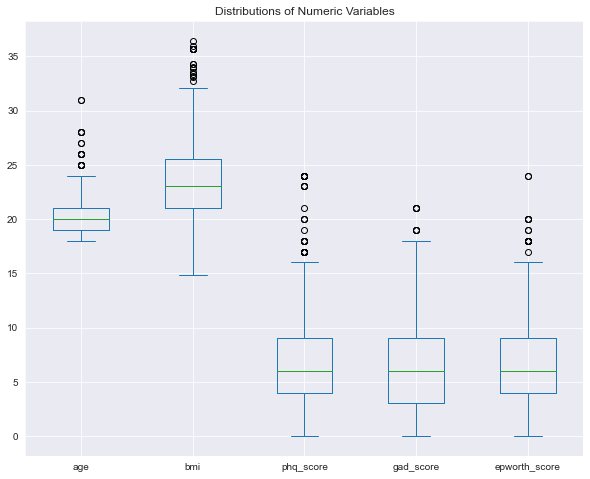

In [33]:
plt.rcParams['figure.figsize'] = [10, 8]
sns.set_style('darkgrid')
df_strat.plot(kind='box')
plt.title("Distributions of Numeric Variables")
plt.show()

In [34]:
#Average count of subjects by gender
fig = px.histogram(df_strat, x='gender', y='bmi', color='gender', histfunc='count', labels={'gender':'Sex', 'bmi':'BMI'}, title="Count of Subjects by Gender")
fig.show()

In [35]:
#Average bmi by gender
fig = px.histogram(df_strat, x='gender', y='bmi', color='gender', histfunc='avg', labels={'gender':'Sex', 'bmi':'BMI'}, title="Average BMI by Gender")
fig.show()

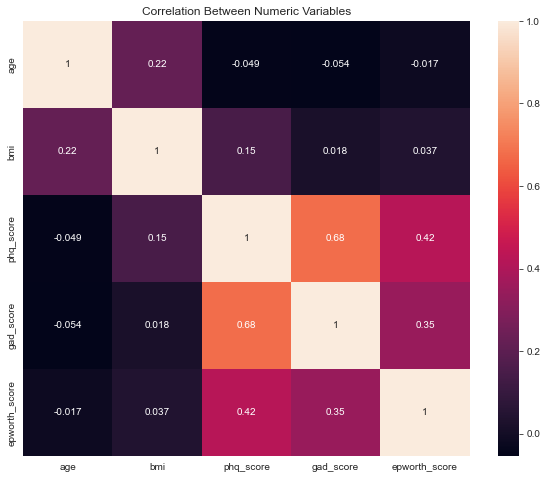

In [36]:
#Checking for correlation between numeric variables
sns.heatmap(df_strat.corr(), annot=True)
plt.title("Correlation Between Numeric Variables")
plt.show()

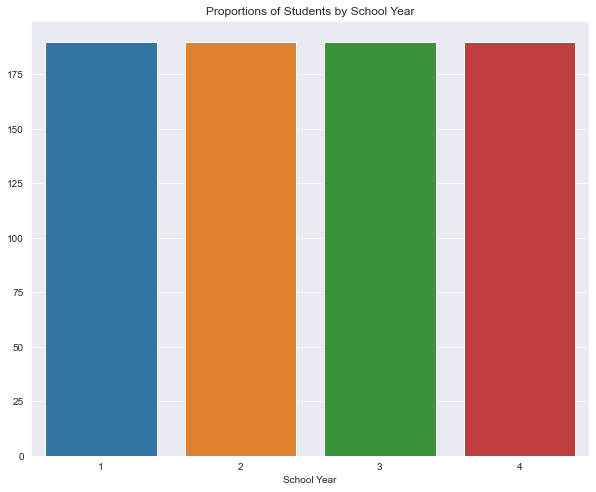

In [37]:
sns.countplot(x='school_year', data=df_strat)
plt.title("Proportions of Students by School Year")
plt.ylabel('')
plt.xlabel("School Year")
plt.show()

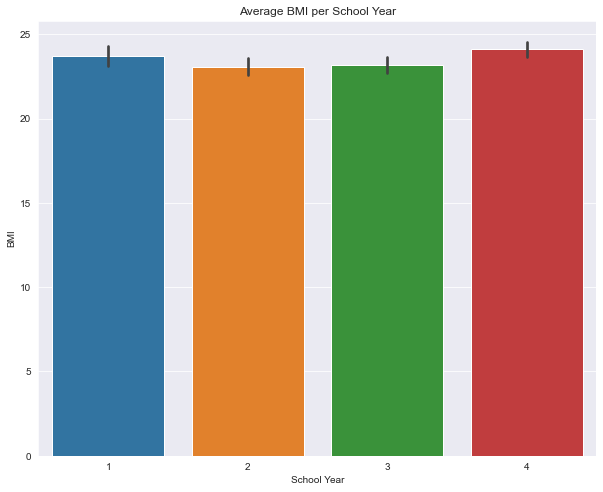

In [38]:
ax = sns.barplot(x='school_year', y='bmi', data=df_strat)
ax.set(xlabel="School Year", ylabel="BMI", title="Average BMI per School Year")
plt.show()

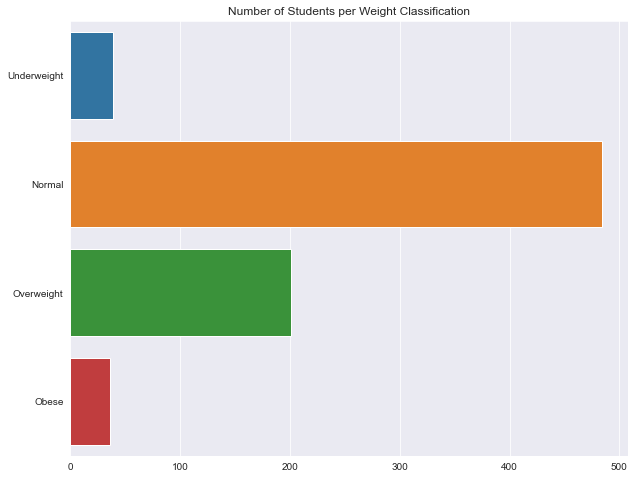

In [39]:
sns.countplot(data=df_strat, y='who_bmi')
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Students per Weight Classification')
plt.show()

In [40]:
#Proportions of WHO weight classes 
df_strat['who_bmi'].value_counts(sort=True, normalize=True)

Normal         0.636842
Overweight     0.264474
Underweight    0.051316
Obese          0.047368
Name: who_bmi, dtype: float64

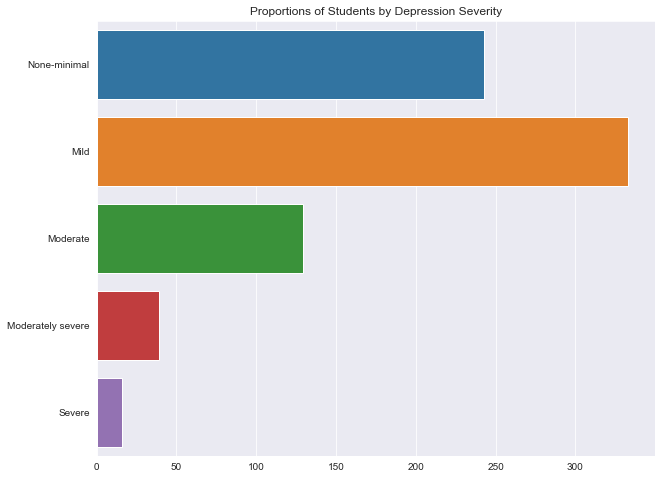

In [41]:
sns.countplot(data=df_strat, y='depression_severity')
plt.xlabel("")
plt.ylabel('')
plt.title("Proportions of Students by Depression Severity")
plt.show()

In [42]:
#Proportions of Students by Depression Severity
df_strat['depression_severity'].value_counts(sort=True, normalize=True)

Mild                 0.438158
None-minimal         0.319737
Moderate             0.169737
Moderately severe    0.051316
Severe               0.021053
Name: depression_severity, dtype: float64

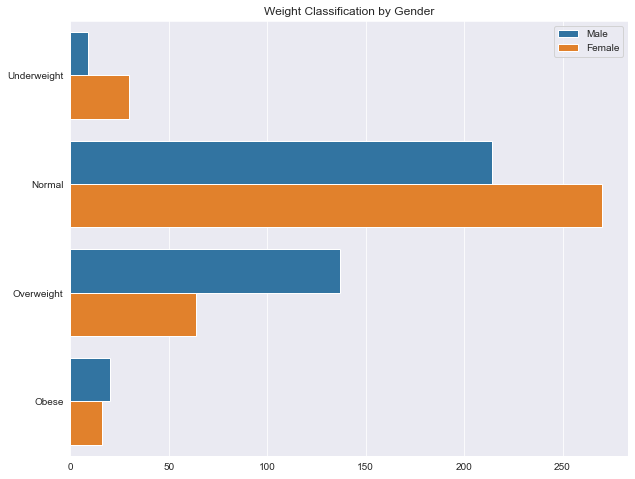

In [43]:
sns.countplot(data=df_strat, y='who_bmi', hue='gender', hue_order=['male', 'female'])
plt.legend(['Male', 'Female'])
plt.xlabel('')
plt.ylabel('')
plt.title('Weight Classification by Gender')
plt.show()

In [44]:
#Proportions of WHO weight classes by Gender
df_strat.groupby('gender')['who_bmi'].value_counts(sort=True, normalize=True)

gender             
female  Normal         0.710526
        Overweight     0.168421
        Underweight    0.078947
        Obese          0.042105
male    Normal         0.563158
        Overweight     0.360526
        Obese          0.052632
        Underweight    0.023684
Name: who_bmi, dtype: float64

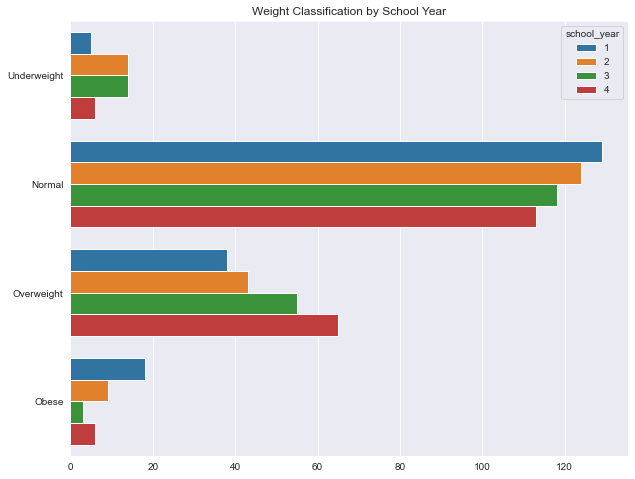

In [45]:
sns.countplot(data=df_strat, y='who_bmi', hue='school_year')
plt.xlabel('')
plt.ylabel('')
plt.title('Weight Classification by School Year')
plt.show()

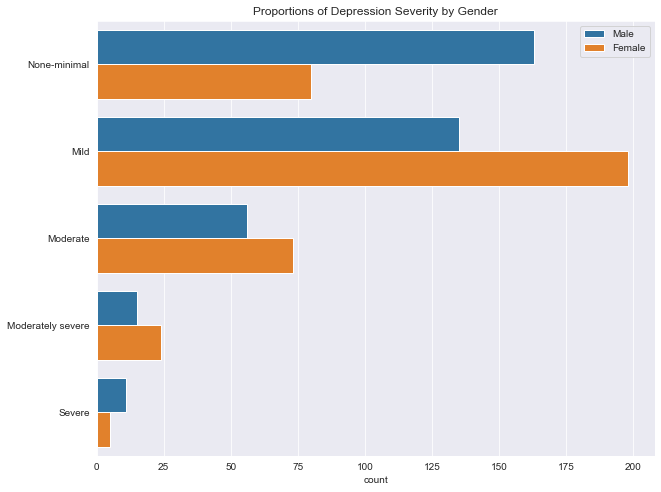

In [46]:
sns.countplot(data=df_strat, y='depression_severity', hue='gender', hue_order=['male', 'female'])
plt.legend(['Male', 'Female'])
plt.title("Proportions of Depression Severity by Gender")
plt.ylabel('')
plt.show()

In [47]:
#Proportions of Depression Severity by Gender
df_strat.groupby('gender')['depression_severity'].value_counts(sort=True, normalize=True)

gender                   
female  Mild                 0.521053
        None-minimal         0.210526
        Moderate             0.192105
        Moderately severe    0.063158
        Severe               0.013158
male    None-minimal         0.428947
        Mild                 0.355263
        Moderate             0.147368
        Moderately severe    0.039474
        Severe               0.028947
Name: depression_severity, dtype: float64

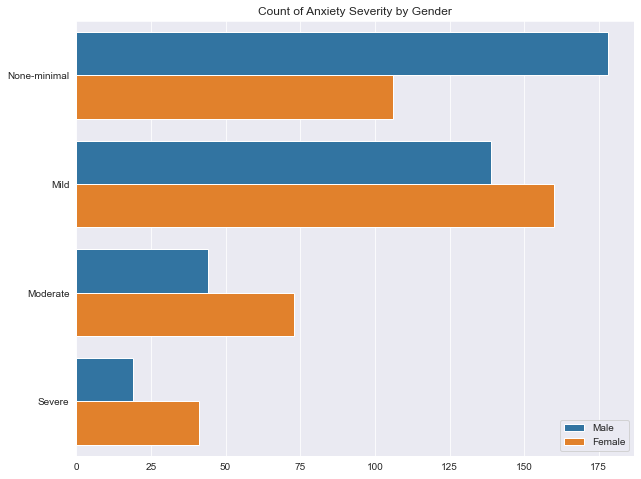

In [48]:
sns.countplot(data=df_strat, y='anxiety_severity', hue='gender', hue_order=['male', 'female'])
plt.legend(['Male', 'Female'])
plt.xlabel("")
plt.ylabel("")
plt.title("Count of Anxiety Severity by Gender")
plt.show()

In [49]:
#Proportions of Anxiety Severity by Gender
df_strat.groupby('gender')['anxiety_severity'].value_counts(sort=True, normalize=True)

gender              
female  Mild            0.421053
        None-minimal    0.278947
        Moderate        0.192105
        Severe          0.107895
male    None-minimal    0.468421
        Mild            0.365789
        Moderate        0.115789
        Severe          0.050000
Name: anxiety_severity, dtype: float64

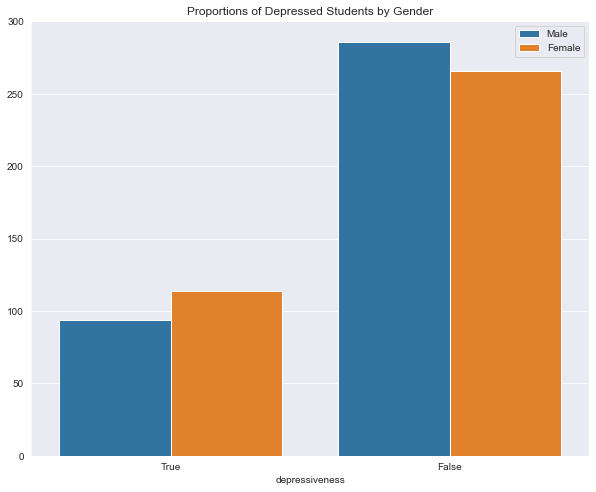

In [50]:
sns.countplot(data=df_strat, x='depressiveness', hue='gender', hue_order=['male', 'female'], order=[True, False])
plt.ylabel('')
plt.legend(['Male', 'Female'])
plt.title("Proportions of Depressed Students by Gender")
plt.show()

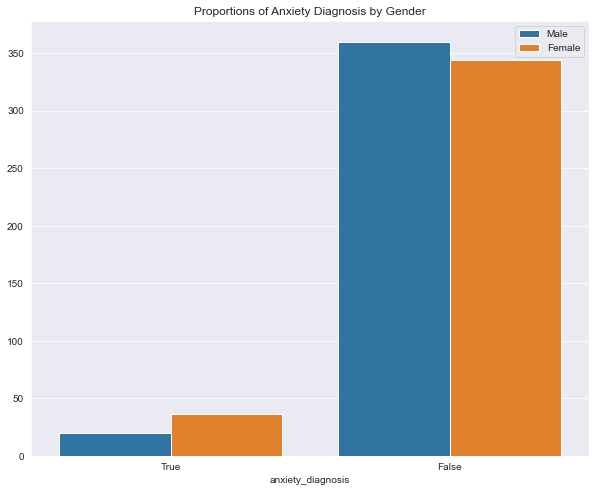

In [51]:
sns.countplot(data=df_strat, x='anxiety_diagnosis', hue='gender', hue_order=['male', 'female'], order=[True, False])
plt.ylabel('')
plt.legend(['Male', 'Female'])
plt.title("Proportions of Anxiety Diagnosis by Gender")
plt.show()

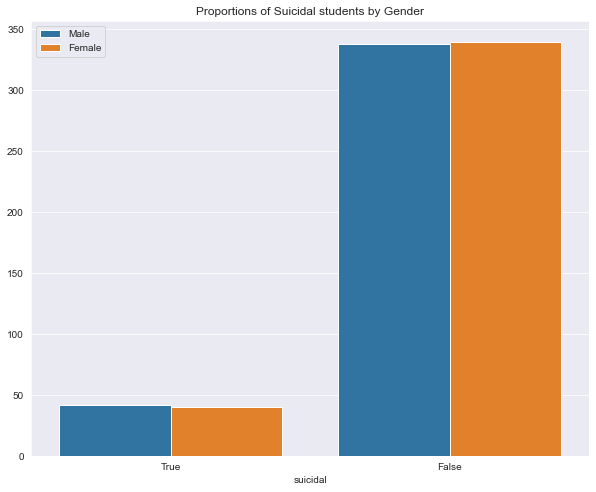

In [52]:
sns.countplot(data=df_strat, x='suicidal', hue='gender', hue_order=['male', 'female'], order=[True, False])
plt.ylabel('')
plt.legend(['Male', 'Female'])
plt.title("Proportions of Suicidal students by Gender")
plt.show()

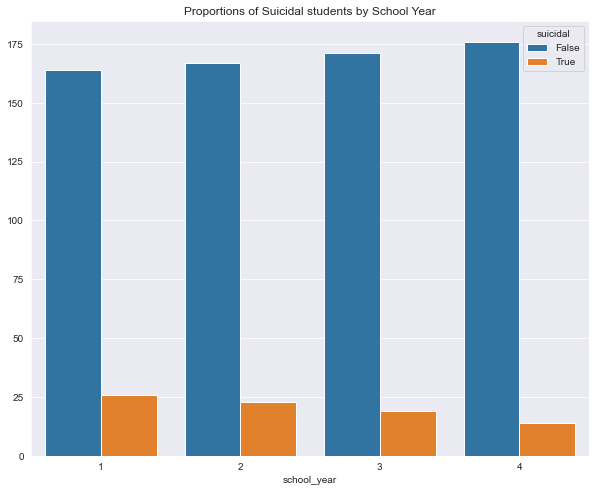

In [53]:
sns.countplot(data=df_strat, x='school_year', hue='suicidal')
plt.ylabel('')
plt.title("Proportions of Suicidal students by School Year")
plt.show()

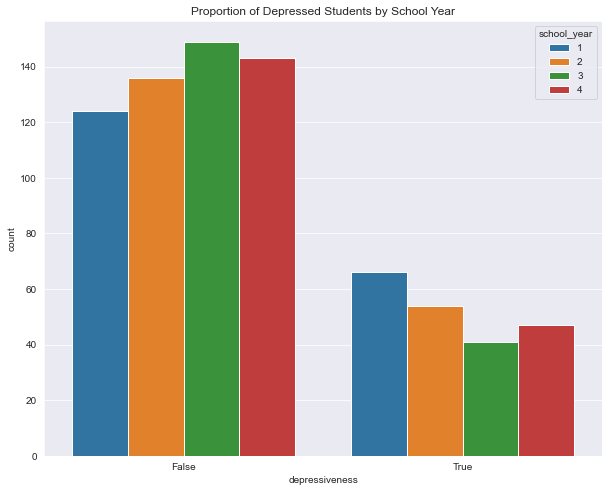

In [54]:
sns.countplot(data=df_strat, x='depressiveness', hue='school_year')
plt.title("Proportion of Depressed Students by School Year")
plt.show()

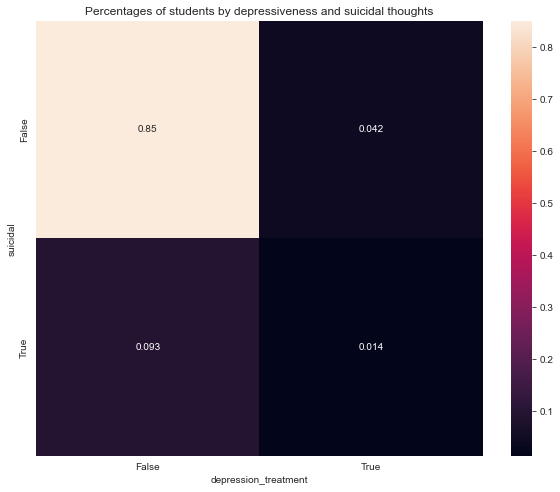

In [55]:
#Percentage of students undergoing treatment and are suicidal
sns.heatmap(pd.crosstab(index=df_strat.suicidal, columns=df_strat.depression_treatment, normalize=True), annot=True)
plt.title('Percentages of students by depressiveness and suicidal thoughts')
plt.show()

In [56]:
#Proportions of Depressed Students with Suicidal thoughts
df_strat.groupby('depressiveness')['suicidal'].value_counts(sort=True, normalize=True)

depressiveness  suicidal
False           False       1.000000
True            False       0.605769
                True        0.394231
Name: suicidal, dtype: float64

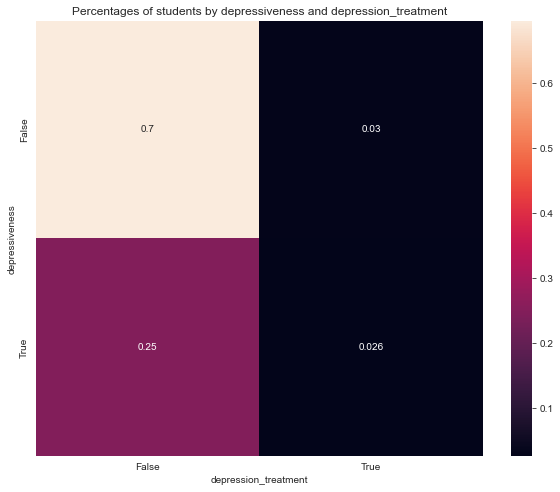

In [57]:
sns.heatmap(pd.crosstab(index=df_strat.depressiveness, columns=df_strat.depression_treatment, normalize=True), annot=True)
plt.title('Percentages of students by depressiveness and depression_treatment')
plt.show()

In [58]:
#Proportions of Depressed Students receiving treatment
df_strat.groupby('depressiveness')['depression_treatment'].value_counts(sort=True, normalize=True)

depressiveness  depression_treatment
False           False                   0.958333
                True                    0.041667
True            False                   0.903846
                True                    0.096154
Name: depression_treatment, dtype: float64

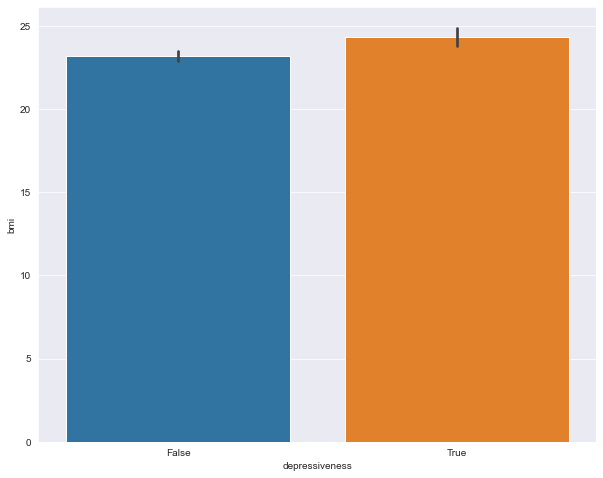

In [59]:
sns.barplot(data=df_strat, x='depressiveness', y='bmi')
plt.show()

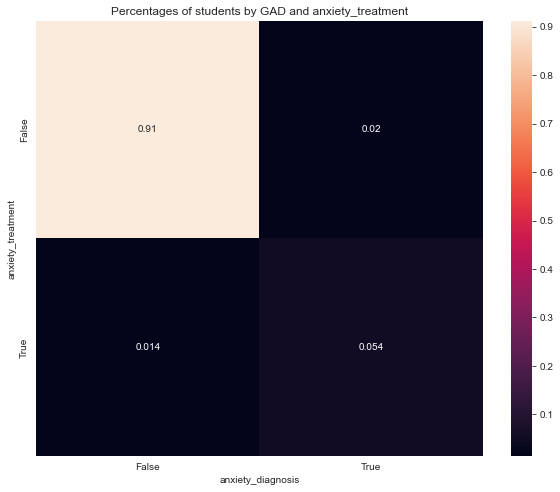

In [60]:
sns.heatmap(pd.crosstab(index=df_strat.anxiety_treatment, columns=df_strat.anxiety_diagnosis, normalize=True), annot=True)
plt.title('Percentages of students by GAD and anxiety_treatment')
plt.show()

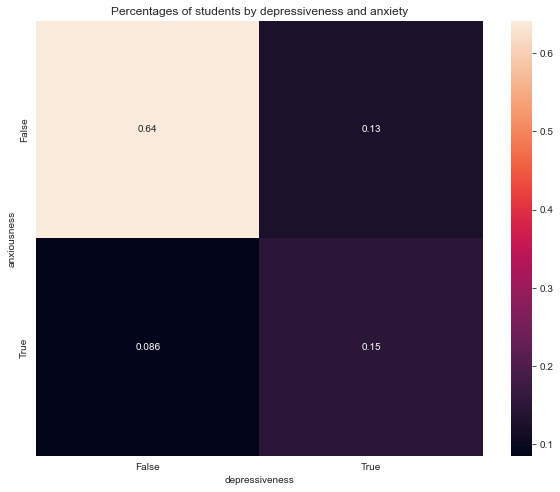

In [61]:
sns.heatmap(pd.crosstab(index=df_strat.anxiousness, columns=df_strat.depressiveness, normalize=True), annot=True)
plt.title('Percentages of students by depressiveness and anxiety')
plt.show()

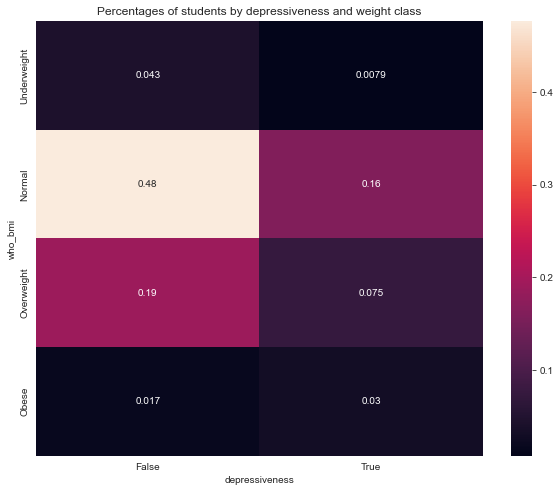

In [62]:
sns.heatmap(pd.crosstab(index=df_strat.who_bmi, columns=df_strat.depressiveness, normalize=True), annot=True)
plt.title('Percentages of students by depressiveness and weight class')
plt.show()

In [63]:
#Proportion of Depressed Students by WHO weight classes
df_strat.groupby('who_bmi')['depressiveness'].value_counts(sort=True, normalize=True)

who_bmi      depressiveness
Underweight  False             0.846154
             True              0.153846
Normal       False             0.747934
             True              0.252066
Overweight   False             0.716418
             True              0.283582
Obese        True              0.638889
             False             0.361111
Name: depressiveness, dtype: float64

### HYPOTHESES FROM EDA
1. The average BMI of a male student is higher than a female student
2. About 64% and 26% of University students are normal and overweight respectively
3. Male students are two times more likely to be overweight than female students
4. Male students are about two times more likely to be severely depressed
5. Female students are two times more likely to experience severe anxiety than males
6. Female students are more likely to be depressed than male students
7. 25% of depressed students receiving treatment are suicidal
8. Students who are depressed have a higher BMI than those who are not
9. Obese Students are 2.5 times more likely to be depressed than normal students
10. Approximately 90% of depressed students are not receiving treatment
11. Approximately 2 out of 5 students have mild depression

# DATA PREPROCESSING FOR MODELING

This phase of the Data Science workflow is performed under the following steps:
1. Feature and Label encoding
2. Feature Extraction using PCA
3. Feature Scaling (Standardization)
4. Splitting data into training and test data

In [64]:
np.random.seed(100) #Setting random seed for code reproducibility

In [65]:
df.head()

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,19,male,33.333333,Obese,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [66]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,740.0,20.270270,1.776385,18.000000,19.000000,20.000000,21.00000,31.000000
bmi,740.0,23.498513,3.436628,14.880952,21.037953,23.208565,25.47666,36.436645
phq_score,740.0,7.148649,4.426768,0.000000,4.000000,6.000000,9.00000,24.000000
gad_score,740.0,6.898649,4.707895,0.000000,3.000000,6.000000,10.00000,21.000000
epworth_score,740.0,6.336486,3.835807,0.000000,3.750000,6.000000,9.00000,24.000000


In [67]:
df.dtypes

school_year             category
age                        int64
gender                  category
bmi                      float64
who_bmi                 category
phq_score                  int64
depression_severity     category
depressiveness            object
suicidal                  object
depression_diagnosis      object
depression_treatment      object
gad_score                  int64
anxiety_severity        category
anxiousness               object
anxiety_diagnosis         object
anxiety_treatment         object
epworth_score            float64
sleepiness                object
dtype: object

In [68]:
#Feature Selection using Domain Knowledge
features_df = df.loc[:, ['school_year', 'age', 'gender', 'bmi', 'gad_score']]

In [69]:
#Label Encoding
target = df.depressiveness.map({True:1, False:0})

In [70]:
target.head()

0    0
1    0
2    0
3    1
4    0
Name: depressiveness, dtype: int64

In [71]:
#Feature Encoding
features_df['gender'] = features_df.gender.map({'male':1, 'female':0})

In [72]:
features_df.gender.head()

0    1
1    1
2    1
3    0
4    1
Name: gender, dtype: category
Categories (2, int64): [0, 1]

In [73]:
features_df.head()

,school_year,age,gender,bmi,gad_score
0,1,19,1,33.333333,11
1,1,18,1,19.841270,5
2,1,19,1,25.102391,6
3,1,18,0,23.738662,15
4,1,18,1,25.617284,14


In [74]:
target.values.shape

(740,)

In [75]:
#Using PCA to identify feature importance
pca = PCA(n_components=2, random_state=100)
pca.fit_transform(features_df.values)
pca.explained_variance_ratio_

array([0.57381994, 0.3062225 ])

In [76]:
#Feature Importance in Descending Order
pd.DataFrame(abs(pca.components_), columns=features_df.columns).mean().sort_values(ascending=False)

gad_score      0.518993
bmi            0.515613
age            0.061953
gender         0.027197
school_year    0.023737
dtype: float64

In [77]:
X = features_df[['age', 'bmi', 'gad_score']].values #Feature Selection using PCA
y = target.values 

In [78]:
#Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [79]:
#Feature Scaling(Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# MODEL TRAINING AND TESTING

This phase of the Data Science workflow is performed under the following steps:
1. Obtaining best classifier using Cross Validation
2. Handling Class Imbalance with SMOTE and RandomUndersampler (using a pipeline)
3. Fitting model to data (using a pipeline)
4. Testing model performance

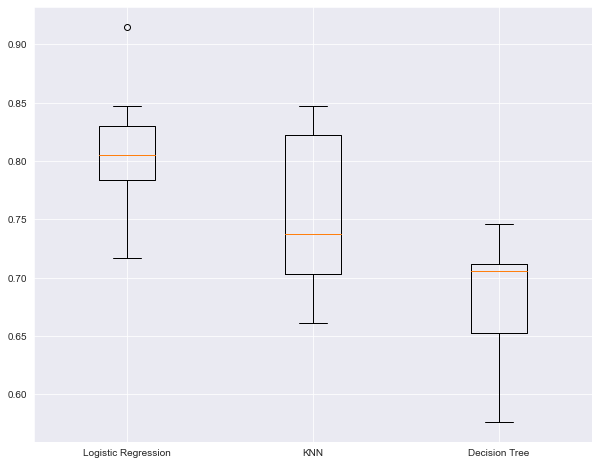

In [80]:
#Cross Validation to obtain best model
models = {'Logistic Regression':LogisticRegression(), 'KNN':KNeighborsClassifier(), 'Decision Tree':DecisionTreeClassifier()}
metrics = []
for model in models.values():
    kf = KFold(n_splits=10, shuffle=True)
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    metrics.append(cv_score)
plt.boxplot(metrics, labels=models.keys())
plt.show()

In [81]:
#Handling class imbalance with SMOTE and RandomUnderSampler
steps = [('smote', SMOTE()), ('under', RandomUnderSampler()), ('logreg', LogisticRegression())]

In [82]:
#Instantiating Pipeline object
pipeline = Pipeline(steps=steps)

In [83]:
pipeline.fit(X_train_scaled, y_train)

Pipeline(steps=[('smote', SMOTE()), ('under', RandomUnderSampler()),
                ('logreg', LogisticRegression())])

In [84]:
y_pred = pipeline.predict(X_test_scaled)

In [85]:
#Checking Model Performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       108
           1       0.67      0.70      0.68        40

    accuracy                           0.82       148
   macro avg       0.78      0.79      0.78       148
weighted avg       0.83      0.82      0.83       148



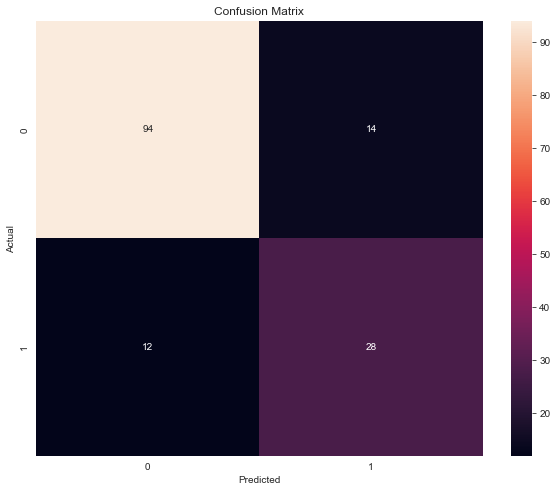

In [86]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [87]:
#Area Under ROC curve
roc_auc_score(y_test, y_pred)

0.7851851851851852